<a href="https://colab.research.google.com/github/Omkarprasad07/datasciencetasks/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
19/19 [==============================] - 7s 31ms/step - loss: 0.1325
Epoch 2/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0113
Epoch 3/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0054
Epoch 4/50
19/19 [==============================] - 1s 33ms/step - loss: 0.0029
Epoch 5/50
19/19 [==============================] - 1s 40ms/step - loss: 0.0019
Epoch 6/50
19/19 [==============================] - 1s 40ms/step - loss: 0.0017
Epoch 7/50
19/19 [==============================] - 1s 43ms/step - loss: 0.0017
Epoch 8/50
19/19 [==============================] - 1s 37ms/step - loss: 0.0017
Epoch 9/50
19/19 [==============================] - 1s 33ms/step - loss: 0.0016
Epoch 10/50
19/19 [==============================] - 1s 32ms/step - loss: 0.0016
Epoch 11/50
19/19 [==============================] - 1s 32ms/step - loss: 0.0016
Epoch 12/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0016
Epoch 13/50
19/19 [==================

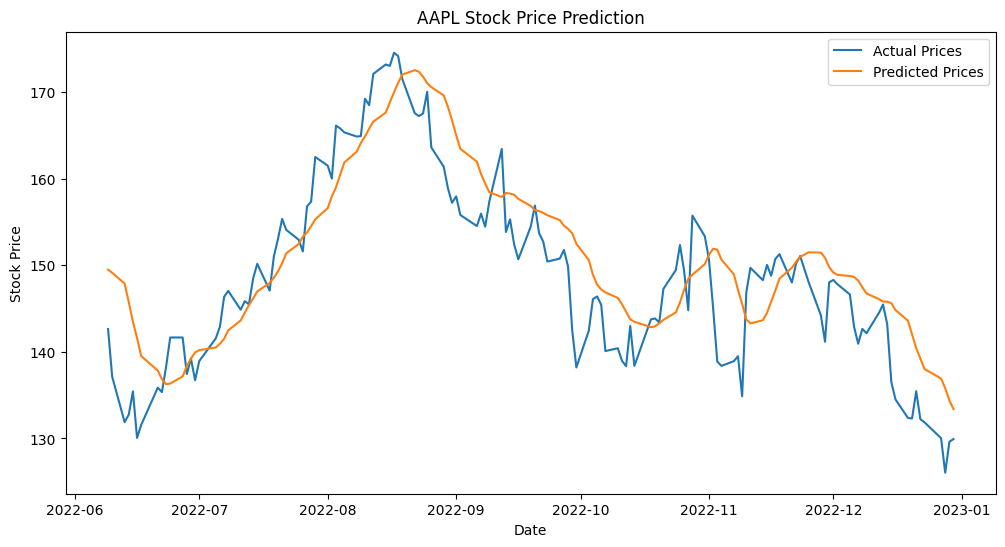

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the stock symbol and download historical data
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"
data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Preprocess the data
data = data[['Close']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for training
sequence_length = 10
X = []
y = []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i - sequence_length:i])
    y.append(data_scaled[i])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + sequence_length:], y_test, label='Actual Prices')
plt.plot(data.index[train_size + sequence_length:], predictions, label='Predicted Prices')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
